# Подготовительный этап
Запускаем подключение необходимых модулей и работу вспомогательных функций

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

# Функция, возвращающая фундаментальные показатели компании
def fundamental_data(ticker, descript):
    global current_price, PE, FPE, PEG, EPS, FEPS, price_to_book, ROE, revenue_per_share, divedend, \
           current_ratio, description, BETA
    info = yf.Ticker(ticker).info
    try:
        current_price = info['currentPrice']
    except:
        current_price = None
    try:
        PE = round(info['trailingPE'], 3)
    except:
        PE = None
    try:
        FPE = round(info['forwardPE'], 3)
    except:
        FPE = None
    try:
        EPS = round(info['trailingEps'], 3)
    except:
        EPS = None
    try:
        FEPS = round(info['forwardEps'], 3)
    except:
        FEPS = None
    try:
        price_to_book = round(info['priceToBook'], 3)
    except:
        price_to_book = None
    try:
        ROE = round(info['returnOnEquity'], 3)
    except:
        ROE = None
    try:
        revenue_per_share = round(info['revenuePerShare'], 3)
    except:
        revenue_per_share = None
    try:
        divedend = round(info['dividendYield'], 3)
    except:
        divedend = 0
    try:
        current_ratio = round(info['currentRatio'], 3)
    except:
        current_ratio = None
    try:
        PEG = round(info['pegRatio'], 3)
    except:
        PEG = None
    try:
        BETA = round(info['beta'], 3)
    except:
        BETA = None
    if descript == 'on':
        try:
            description = info['longBusinessSummary']
        except:
            description = None
    else:
        description = descript
    return current_price, PE, FPE, PEG, EPS, FEPS, price_to_book, ROE, revenue_per_share, divedend, current_ratio, description

# Single Stock Analisys Script
Выводит графики объема торгов, цены акции и список фундаментальных показателей акции по запроссу

In [2]:
def stock (AVG_type = 'ewm',period = '1Y', descript = 'off'):
    sns.set_theme(rc = ({'figure.figsize':(20, 3)}))
    ticker = input('Ticker:')
    get_yf_object = yf.Ticker(ticker)
    data = get_yf_object.history(period = period)
    volume_rolling_45 = data[['Volume']].rolling(window = 45).mean()
    sns.lineplot(data = data, x = 'Date', y = 'Volume', label = 'Volume')
    sns.lineplot(data = volume_rolling_45, x = 'Date', y = 'Volume', label = '45D_SMA')
    plt.title('Volume ' + ticker, fontsize = 17)
    plt.show()
    sns.lineplot(data = data, x = 'Date', y = 'Close', label = 'Price')
    if AVG_type == 'ewm':
        # Екпоненциально взвешенное скользящее среднее
        ewm_20 = data[['Close']].ewm(span = 20, adjust= False).mean()
        ewm_50 = data[['Close']].ewm(span = 50, adjust= False).mean()
        sns.lineplot(data = ewm_20, x = 'Date', y = 'Close', label = '20D_EWM')
        sns.lineplot(data = ewm_50, x = 'Date', y = 'Close', label = '50D_EWM')
    elif AVG_type == 'sma':
        # Простое скользящее среднее
        rolling_20 = data[['Close']].rolling(window = 20).mean()
        rolling_50 = data[['Close']].rolling(window = 50).mean()
        sns.lineplot(data = rolling_20, x = 'Date', y = 'Close', label = '20D_SMA')
        sns.lineplot(data = rolling_50, x = 'Date', y = 'Close', label = '50D_SMA')
    else:
        print('Тип скользящей средней выбран непраильно. Введите либо "emv", либо "sma"')
    plt.title('Stock prices ' + ticker, fontsize = 17)
    plt.show()
# Построение граффиков изменения выручки и прибыли по кварталам и годам   
    qearnings = get_yf_object.quarterly_earnings.reset_index()
    yearnings = get_yf_object.earnings.reset_index()
    plt.subplot(1, 2, 1)
    plt.bar(yearnings['Year'], yearnings['Revenue'], color = 'darkcyan')
    plt.bar(yearnings['Year'], yearnings['Earnings'], color = 'darkolivegreen')
    plt.legend(['Revenue', 'Earnings'])
    plt.title('Year', fontsize = 12)
    plt.subplot(1, 2, 2)
    plt.bar(qearnings['Quarter'], qearnings['Revenue'], color = 'steelblue')
    plt.bar(qearnings['Quarter'], qearnings['Earnings'], color = 'seagreen')
    plt.legend(['Revenue', 'Earnings'])
    plt.title('Quarter', fontsize = 12)
    plt.gcf().set_size_inches(20, 4)
    plt.show()
# Функция, возвращающая фундаментальные показатели компании   
    fundamental_data(ticker, descript)
    print('Current price={}, P/S={}, P/E={}, FP/E={}, PEG={}, EPS={}, FEPS={}, Eps/Current price={},\n \
          P/B={}, ROE={}, Divedend yield={}, Current ratio={}, BETA = {}'.
         format(current_price, round(current_price/revenue_per_share, 3), PE, FPE, PEG, EPS, FEPS, round(EPS/current_price, 3),
                price_to_book, ROE, divedend, current_ratio, BETA))
    if descript == 'on':
        print('Description:\n{}'.format(description))

 - P/E - показатель отношения стоимости компании к ее годовой прибыли
 
 - P/S (P/R) - показатель отношения стоимости компании к ее годовой выручке
 
 - PEG = (P/E)/Grows - показатель харрактеризующий как оценена компания в настоящий момент с учетом роста ее прибыли в будущем.

 - P/B показывает на сколько справедливо оценена компания к своей балансовой стоимости. Т.е P/B = капитализация компании/(активы компании - долги компании)
 
 - current ratio(Коэффициент текущей ликвидности) отношение текущих активов компании к ее текущим обязательствам. Показывает как на сколько наши активы, относительно быстро реализуемые, позволяют погасить наши обязательства (без догосрочных обязательств и обзательств в разделе капитал). Показывает на сколько мы можем прямо здесь и сейчас погасить наши долги
 
 - BETA (показатель риска компании). Коэффициент "b" уравенения линейной регрессии описывающей доходность актива в зависимости от доходности индекса. При BETA > 1 средняя волатильность актива выше средней волатильности индекса. При BETA = 1 средняя волатильность актива равна стредней волатильности индекса. При BETA < 1 средняя волатильность актива меньше средней волатильности индекса. При BETA < 0 средняя волатильность актива обладает противоположной динамикой относительно волатильности индекса

Ticker:JNJ


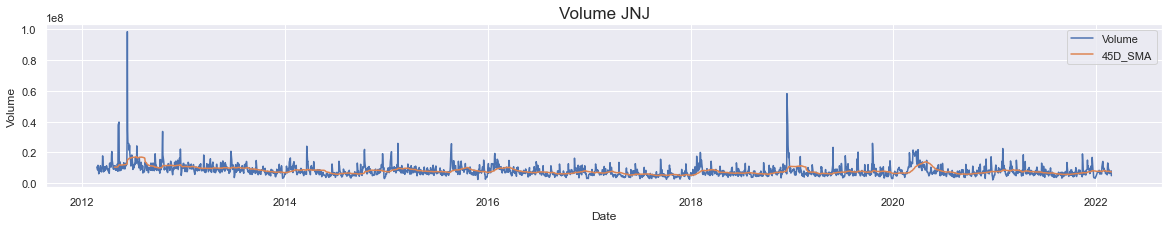

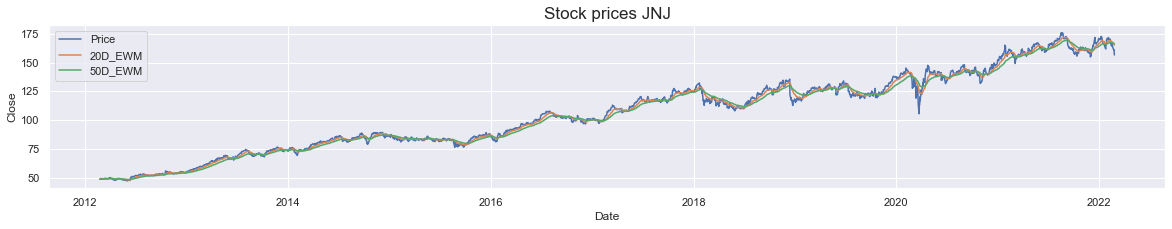

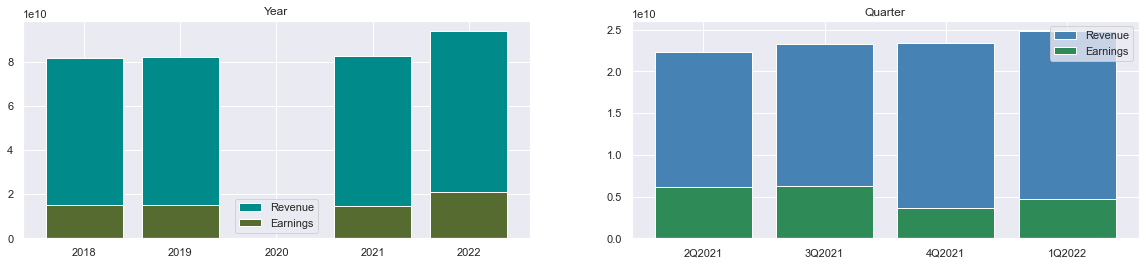

Current price=156.73, P/S=4.399, P/E=20.068, FP/E=14.274, PEG=2.4, EPS=7.81, FEPS=10.98, Eps/Current price=0.05,
           P/B=5.566, ROE=0.304, Divedend yield=0.026, Current ratio=1.348, BETA = 0.711
Description:
Johnson & Johnson researches and develops, manufactures, and sells various products in the healthcare field worldwide. It operates in three segments: Consumer Health, Pharmaceutical, and Medical Devices. The Consumer Health segment offers baby care products under the JOHNSON'S and AVEENO Baby brands; oral care products under the LISTERINE brand; skin health/beauty products under the AVEENO, CLEAN & CLEAR, DR. CI:LABO, NEUTROGENA, and OGX brands; acetaminophen products under the TYLENOL brand; cold, flu, and allergy products under the SUDAFED brand; allergy products under the BENADRYL and ZYRTEC brands; ibuprofen products under the MOTRIN IB brand; smoking cessation products under the NICORETTE brand; and acid reflux products under the PEPCID brand. This segment also provides

In [14]:
stock('ewm', '10Y', 'on')

# Fundamental Data Table
Формирует объект DataFrame, содержащий в себе фундаментальные показатели множества акций

In [3]:
# Получаем список тикеров, данные которых будут содержаться в таблице
nasdaq_screener = pd.read_csv('nasdaq_screener.csv') \
                    .sort_values(by = 'Market Cap', ascending = False) \
                    .reset_index(drop = True)
nasdaq_info = nasdaq_screener[['Symbol', 'Name', 'Country', 'Sector', 'Industry']]
sorted_tickers = nasdaq_screener[:1000]
sorted_tickers
#nasdaq_info

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$149.80,-2.77,-1.816%,2.597134e+12,United States,1980.0,124848120,Technology,Computer Manufacturing
1,MSFT,Microsoft Corporation Common Stock,$331.62,7.27,2.241%,2.489796e+12,United States,1986.0,34744907,Technology,Computer Software: Prepackaged Software
2,GOOG,Alphabet Inc. Class C Capital Stock,$2965.41,42.83,1.465%,1.968332e+12,United States,2004.0,1447265,Technology,Internet and Information Services
3,GOOGL,Alphabet Inc. Class A Common Stock,$2960.92,43.94,1.506%,1.965352e+12,United States,NaN,2163749,Technology,Internet and Information Services
4,AMZN,Amazon.com Inc. Common Stock,$3372.43,-74.14,-2.151%,1.707935e+12,United States,1997.0,6468929,Consumer Services,Catalog/Specialty Distribution
...,...,...,...,...,...,...,...,...,...,...,...
995,ALV,Autoliv Inc. Common Stock,$96.85,-0.24,-0.247%,8.472268e+09,Sweden,NaN,549317,Capital Goods,Auto Parts:O.E.M.
996,BLD,TopBuild Corp. Common Stock,$256.97,2.86,1.125%,8.463276e+09,United States,2015.0,196457,Capital Goods,Engineering & Construction
997,LECO,Lincoln Electric Holdings Inc. Common Shares,$142.40,2.00,1.425%,8.456652e+09,United States,NaN,354555,Capital Goods,Industrial Machinery/Components
998,GNTX,Gentex Corporation Common Stock,$35.39,0.28,0.797%,8.456585e+09,United States,NaN,1434952,Capital Goods,Auto Parts:O.E.M.


In [4]:
# формируем DataFrame на основании интересующего списка тикеров
i = 0    
stocks = []
for ticker in sorted_tickers['Symbol']:
    fundamental_data(ticker, descript = 'off')
    try:
        stocks.append([ticker, current_price, round(current_price/revenue_per_share, 3), PE, FPE, PEG, EPS, FEPS, \
                       price_to_book, ROE, divedend, current_ratio, BETA])
    except:
        stocks.append([ticker, current_price, None, PE, FPE, PEG, EPS, FEPS, \
                       price_to_book, ROE, divedend, current_ratio, BETA])
    print(i)
    i +=1
    
stocks_df_full = pd.DataFrame(stocks, columns = ['ticker', 'current price', 'P/S', 'P/E', 'FP/E', 'PEG', 'EPS', 'FEPS', 
                                            'P/B', 'ROE', 'divedend', 'current ratio', 'BETA'])
stocks_df = stocks_df_full[(stocks_df_full['FEPS'].notna()) & (stocks_df_full['EPS'].notna())]

# Функиця для расчета коэфициента роста
def grows(row):
    if (row[6] > 0 and row[7] >= 0) or (row[6] > 0 and row[7] < 0):
        return (row[7] - row[6])/row[6]
    elif (row[6] < 0 and row[7] >= 0) or (row[6] < 0 and row[7] < 0):
        return (row[7]-row[6])/(row[6] * (-1))
    else:
        None
    
stocks_df['grows'] = stocks_df.apply(grows, axis = 1)    
stocks_df = stocks_df.merge(nasdaq_info, left_on = 'ticker', right_on = 'Symbol', how = 'left')\
                     .drop(columns = 'Symbol')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-4-a4b4ecc854ee>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['grows'] = stocks_df.apply(grows, axis = 1)


In [5]:
stocks_df.head(10)

,ticker,current price,P/S,P/E,FP/E,PEG,EPS,FEPS,P/B,ROE,divedend,current ratio,BETA,grows,Name,Country,Sector,Industry
0,AAPL,164.85,7.218,27.406,25.130,1.75,6.015,6.56,37.449,1.456,0.005,1.038,1.187,0.090607,Apple Inc. Common Stock,United States,Technology,Computer Manufacturing
1,MSFT,297.31,12.093,31.666,27.657,1.72,9.389,10.75,13.935,0.491,0.008,2.247,0.889,0.144957,Microsoft Corporation Common Stock,United States,Technology,Computer Software: Prepackaged Software
2,GOOG,2690.39,6.972,23.979,19.855,0.80,112.197,135.50,7.079,0.321,0.000,2.928,1.070,0.207697,Alphabet Inc. Class C Capital Stock,United States,Technology,Internet and Information Services
3,GOOGL,2689.19,6.969,23.968,19.852,0.80,112.197,135.46,7.076,0.321,0.000,2.928,1.070,0.207341,Alphabet Inc. Class A Common Stock,United States,Technology,Internet and Information Services
4,AMZN,3075.77,3.313,47.458,42.319,1.70,64.810,72.68,11.325,0.288,0.000,1.136,1.127,0.121432,Amazon.com Inc. Common Stock,United States,Consumer Services,Catalog/Specialty Distribution
5,TSLA,809.87,14.836,165.246,63.619,3.36,4.901,12.73,27.712,0.204,0.000,1.375,2.006,1.597429,Tesla Inc. Common Stock,United States,Capital Goods,Auto Manufacturing
6,FB,210.48,5.024,15.285,14.318,0.74,13.770,14.70,4.751,0.311,0.000,3.154,1.285,0.067538,Facebook Inc. Class A Common Stock,United States,Technology,Internet and Information Services
7,NVDA,241.57,22.403,62.745,36.001,1.32,3.850,6.71,22.730,0.448,0.001,6.650,1.384,0.742857,NVIDIA Corporation Common Stock,United States,Technology,Semiconductors
8,TSM,111.23,0.363,26.965,17.462,1.05,4.125,6.37,0.266,0.297,0.018,2.173,1.008,0.544242,Taiwan Semiconductor Manufacturing Company Ltd.,Taiwan,Technology,Semiconductors
9,JPM,147.97,3.416,9.633,11.866,1.18,15.360,12.47,1.680,0.169,0.028,NaN,1.116,-0.188151,JP Morgan Chase & Co. Common Stock,United States,Finance,Major Banks


In [6]:
stocks_df.to_excel('{} - stocks_df.xlsx'.format(datetime.now().date()))

### Проверка связей между показателями компаний

In [7]:
correlation_check = stocks_df.iloc[:, 1:14]
correlation_check

,current price,P/S,P/E,FP/E,PEG,EPS,FEPS,P/B,ROE,divedend,current ratio,BETA,grows
0,168.64,7.384,28.037,25.668,1.88,6.015,6.57,38.310,1.456,0.005,1.038,1.187,0.092269
1,295.04,12.001,31.424,27.446,1.86,9.389,10.75,13.829,0.491,0.008,2.247,0.889,0.144957
2,2682.60,6.952,23.910,19.830,0.87,112.197,135.28,7.059,0.321,0.000,2.928,1.070,0.205736
3,2685.65,6.960,23.937,19.854,0.87,112.197,135.27,7.067,0.321,0.000,2.928,1.070,0.205647
4,3065.87,3.302,47.306,42.259,1.90,64.810,72.55,11.288,0.288,0.000,1.136,1.127,0.119426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,98.69,0.999,17.021,13.538,0.46,5.798,7.29,3.375,0.218,0.024,1.320,1.754,0.257330
972,227.18,2.371,23.811,16.692,1.14,9.541,13.61,4.756,0.223,0.000,1.826,1.519,0.426475
973,125.96,2.430,28.376,17.917,1.05,4.439,7.03,8.669,0.341,0.016,1.658,1.206,0.583690
974,30.32,3.913,17.506,15.313,1.55,1.732,1.98,3.799,0.222,0.013,4.545,0.946,0.143187


<AxesSubplot:>

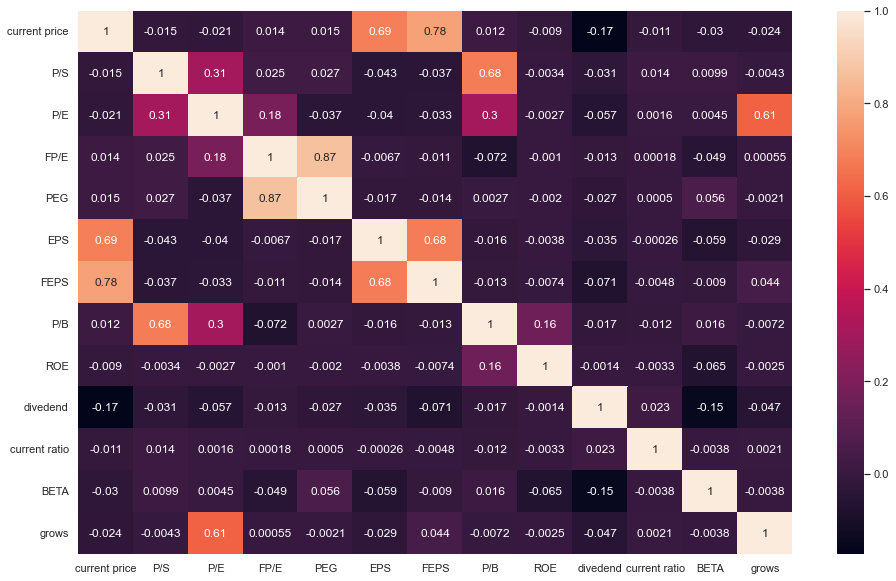

In [8]:
sns.set_theme(rc = ({'figure.figsize':(16, 10)}))
sns.heatmap(data = correlation_check.corr(), annot = True)

#### Выводы:
 - видна сильная корреляция между текущей оценкой компаниии (P/E) и ее коэфицентом ожидаемого роста прибыли на акцию в следующем году (grows)

### Проверка связей таблицы для отдельных секторов и индустрий

In [10]:
sectors = stocks_df['Sector'].unique()
industries = stocks_df['Industry'].unique()

In [37]:
sectors

array(['Energy', 'Technology', nan, 'Miscellaneous', 'Health Care',
       'Public Utilities', 'Consumer Services', 'Finance',
       'Consumer Non-Durables', 'Capital Goods', 'Basic Industries',
       'Transportation', 'Consumer Durables'], dtype=object)

sector:Health Care
Health Care


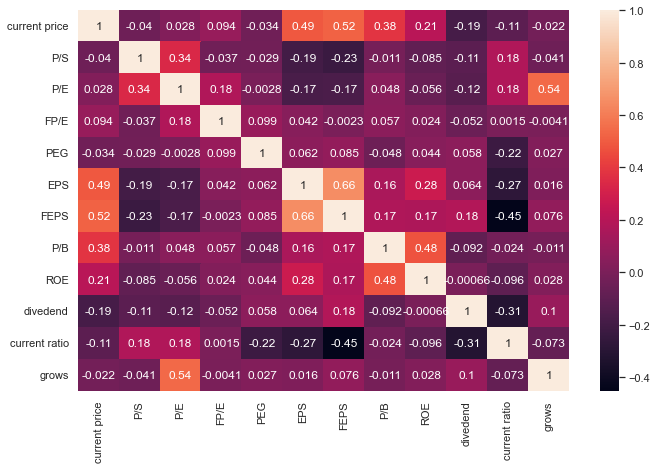

In [38]:
sector = str(input('sector:'))
correlation_sector = stocks_df[stocks_df['Sector'] == sector].iloc[:, 1:13]
sns.set_theme(rc = ({'figure.figsize':(11, 7)}))
sns.heatmap(data = correlation_sector.corr(), annot = True)
plt.show()

In [40]:
industries

array(['Integrated oil Companies', 'EDP Services', nan,
       'Oil & Gas Production', 'Other Consumer Services',
       'Computer Software: Prepackaged Software', 'Managed Health Care',
       'Business Services', 'Biotechnology: Pharmaceutical Preparations',
       'Electric Utilities: Central', 'Telecommunications Equipment',
       'Broadcasting', 'Investment Bankers/Brokers/Service',
       'Commercial Banks', 'Farming/Seeds/Milling',
       'Automotive Aftermarket', 'Medical/Dental Instruments',
       'Diversified Commercial Services', 'Movies/Entertainment',
       'Biotechnology: Biological Products (No Diagnostic Substances)',
       'Real Estate Investment Trusts', 'Rental/Leasing Companies',
       'Semiconductors', 'Electronic Components', 'Paints/Coatings',
       'Military/Government/Technical', 'Industrial Machinery/Components',
       'Fluid Controls', 'Aerospace', 'Professional Services',
       'Industrial Specialties',
       'Biotechnology: Commercial Physical & Bi

industry:Farming/Seeds/Milling


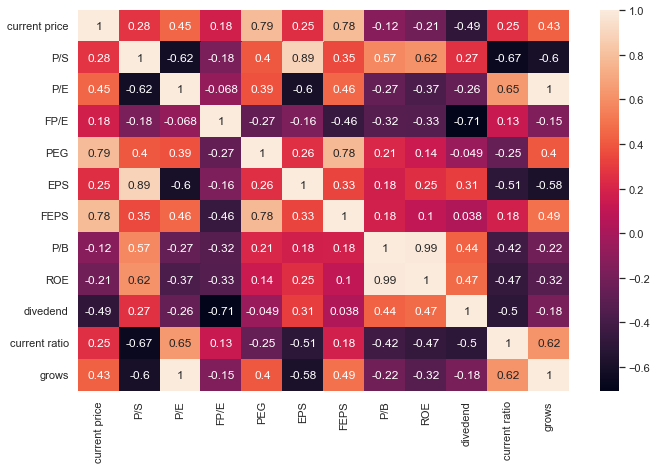

In [44]:
industry = str(input('industry:'))
correlation_industry = stocks_df[stocks_df['Industry'] == industry].iloc[:, 1:13]
sns.set_theme(rc = ({'figure.figsize':(11, 7)}))
sns.heatmap(data = correlation_industry.corr(), annot = True)
plt.show()